## Comparison of all unstable ABL Runs

In [1]:
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
%%capture
# Important header information
naluhelperdir = '/ascldap/users/lcheung/local/Git/naluhelperscripts/'
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, naluhelperdir)
import plotABLstats
import yaml as yaml
from matplotlib.lines import Line2D
%matplotlib inline

In [3]:
# Target TI conditions
target_unstable = [[5,     10,    15],             # WS
                   [0.080, 0.075, 0.09],           # TI levels
                   [0.0,   0.0,   0.0],]           # Shear levels
target_neutral  = [[5,     10,    15],             # WS
                   [0.055, 0.055, 0.065]]          # TI levels
target_stable   = [[5,     10,    15],             # WS
                   [0.045, 0.050, 0.06]]           # TI levels


In [4]:
# Locations of all of the runs
baserundir = '/ascldap/users/lcheung/nscratch/Torque2020/Runs/'
NumReqCols = 4   # Number of required columns in the table

runlist=[
    # Name,          Location,              averaging times,  yaml file, extra dict
    #['10ms_iter05', 'stable/05ms/mini05_iter05',   [15000, 17500],  'abl_mini05ms_iter05_run1.yaml', {'ablfile':'abl_statistics.nc.run1','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['05ms_iter15', 'stable/05ms/mini05_iter15',   [15000, 20000],  'abl_mini05ms_iter15_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['05ms_iter16', 'stable/05ms/mini05_iter16',   [15000, 20000],  'abl_mini05ms_iter16_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['05ms_iter17', 'stable/05ms/mini05_iter17',   [15000, 20000],  'abl_mini05ms_iter17_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['05ms_iter18', 'stable/05ms/mini05_iter18',   [15000, 20000],  'abl_mini05ms_iter18_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['05ms_iter01', 'stable/05ms/05ms_iter01',     [15000, 20000],  'abl_stable05ms_iter01_run1.yaml', {'ablfile':'abl_statistics.nc','color':'r', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    
    # 10 m/s cases
    #['10ms_mini06', 'stable/gpfs1.10ms/mini10_iter06', [15000, 20000],  'abl_mini10ms_iter06_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    #['10ms_mini08', 'stable/gpfs1.10ms/mini10_iter08', [15000, 20000],  'abl_mini10ms_iter08_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    #['10ms_mini10', 'stable/gpfs1.10ms/mini10_iter10', [15000, 20000],  'abl_mini10ms_iter10_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    #['10ms_mini13', 'stable/gpfs1.10ms/mini10_iter13', [15000, 20000],  'abl_mini10ms_iter13_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    #['10ms_mini14', 'stable/gpfs1.10ms/mini10_iter14', [15000, 20000],  'abl_mini10ms_iter14_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    #['10ms_mini15', '/stable/10ms/mini10_iter15',      [15000, 20000],  'abl_mini10ms_iter15_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['10ms_mini16', '/stable/10ms/mini10_iter16',      [15000, 20000],  'abl_mini10ms_iter16_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['10ms_mini17', '/stable/10ms/mini10_iter17',      [15000, 20000],  'abl_mini10ms_iter17_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['10ms_mini18', '/stable/10ms/mini10_iter18',      [15000, 20000],  'abl_mini10ms_iter18_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['10ms_iter01', '/stable/10ms/10ms_iter01',        [15000, 20000],  'abl_stable10ms_iter01_run1.yaml', {'ablfile':'abl_statistics.nc','color':'r', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    
    # 15 m/s cases
    ['15ms_mini01', '/stable/15ms/mini15_iter01',      [15000, 20000],  'abl_mini15ms_iter01_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['15ms_mini02', '/stable/15ms/mini15_iter02',      [15000, 20000],  'abl_mini15ms_iter02_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['15ms_iter01', '/stable/15ms/15ms_iter01',        [15000, 20000],  'abl_stable15ms_iter01_run1.yaml', {'ablfile':'abl_statistics.nc','color':'r', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    
    # 10 m/s cases
    #['10ms_mini02', 'unstable/10ms/mini10_iter02',[2000, 6000],   'abl_mini10ms_iter02_run1.yaml', {'ablfile':'abl_statistics.nc','color':'r', 'lstyle':'--'}],
    #['10ms_mini03', 'unstable/10ms/mini10_iter03',[10000, 15000],  'abl_mini10ms_iter03_run1.yaml', {'ablfile':'abl_statistics.nc','color':'r', 'lstyle':'-'}],
    #['10ms_mini05', 'unstable/10ms/mini10_iter05',[10000, 15000],  'abl_mini10ms_iter05_run1.yaml', {'ablfile':'abl_statistics.nc','color':'r', 'lstyle':'-'}],
    #['10ms_mini08', 'unstable/10ms/mini10_iter08',[20000, 25000],  'abl_mini10ms_iter08_run1.yaml', {'ablfile':'abl_statistics.nc','color':'k', 'lstyle':'-'}],
    
]

# Hub-height locations
plotheights=[20]

In [5]:
%%capture
# Pull the data from disk
alldata=[]
for run in runlist:
    print('Loading '+run[0])
    rundict       = run[NumReqCols] if (len(run)>NumReqCols) else {}
    statsfile     = rundict['ablfile'] if 'ablfile' in rundict else 'abl_statistics.nc'
    rundir        = baserundir+'/'+run[1]
    avgtimes      = run[2]
    data          = plotABLstats.ABLStatsFileClass(stats_file=rundir+'/'+statsfile);
    runresults    = plotABLstats.reportABLstats(data, heights=plotheights, tlims=avgtimes);
    alldata.append(runresults[0])
allrundata=np.array(alldata)

In [6]:
# What does the data look like?
for irow, row in enumerate(allrundata): 
    print('%15s '%runlist[irow][0]+' '.join(['%e'%x for x in row]))

    05ms_iter15 4.999975e+00 5.111157e-02 1.915787e-01 2.249939e+02 4.290217e+02
    05ms_iter16 4.999982e+00 3.981262e-02 2.505373e-01 2.249870e+02 6.591398e+02
    05ms_iter17 4.999997e+00 4.880130e-02 2.120526e-01 2.249913e+02 4.385523e+02
    05ms_iter18 4.999994e+00 4.478514e-02 2.287427e-01 2.249893e+02 5.066315e+02
    05ms_iter01 5.000023e+00 4.618363e-02 2.313828e-01 2.249883e+02 4.281481e+02
    10ms_mini16 9.999568e+00 3.952480e-02 2.740716e-01 2.249930e+02 5.356358e+02
    10ms_mini17 9.999691e+00 5.209277e-02 1.972605e-01 2.249975e+02 3.588719e+02
    10ms_mini18 9.999740e+00 5.126299e-02 2.117339e-01 2.249967e+02 3.293226e+02
    10ms_iter01 9.999703e+00 5.122652e-02 2.127016e-01 2.249964e+02 3.568743e+02
    15ms_mini01 1.499957e+01 6.111413e-02 1.236542e-01 2.250018e+02 4.191344e+02
    15ms_mini02 1.499953e+01 6.072897e-02 1.342599e-01 2.250020e+02 3.864966e+02
    15ms_iter01 1.499955e+01 6.090779e-02 1.320644e-01 2.250017e+02 3.762879e+02


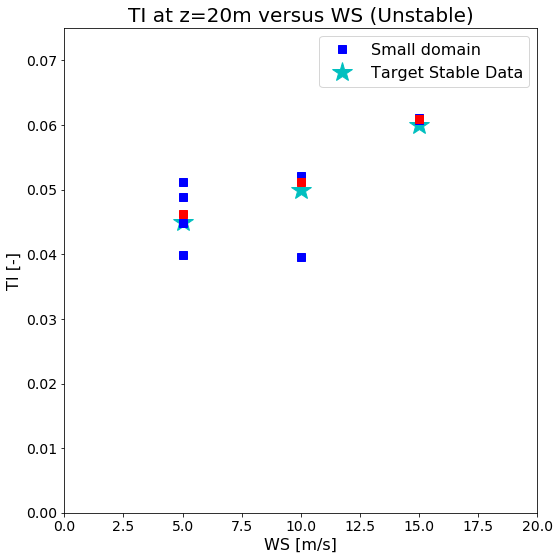

In [10]:
plt.figure(figsize=(8,8))
# Plot the target conditions
plt.plot(target_stable[0],  target_stable[1],  'c*',  markersize=20, label='target unstable')
plt.rc('font', size=14)
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = rundict['color'] if 'color' in rundict else 'r'
    plt.plot(rundata[0], rundata[1], 's', color=pltcolor, markersize=8)

# Formatting
plt.xlim([0, 20])
plt.ylim([0, 0.075])
plt.xlabel('WS [m/s]', fontsize=16)
plt.ylabel('TI [-]', fontsize=16)
plt.title('TI at z=20m versus WS (Unstable)', fontsize=20)
legend_el = [ #Line2D([0],[0], linestyle='', marker='s', markersize=8, color='b', label='Large domain'),
             Line2D([0],[0], linestyle='', marker='s', markersize=8,  color='b', label='Small domain'),
             Line2D([0],[0], linestyle='', marker='*', markersize=20, color='c', label='Target Stable Data')]
plt.legend(handles=legend_el, fontsize=16)
plt.tight_layout()

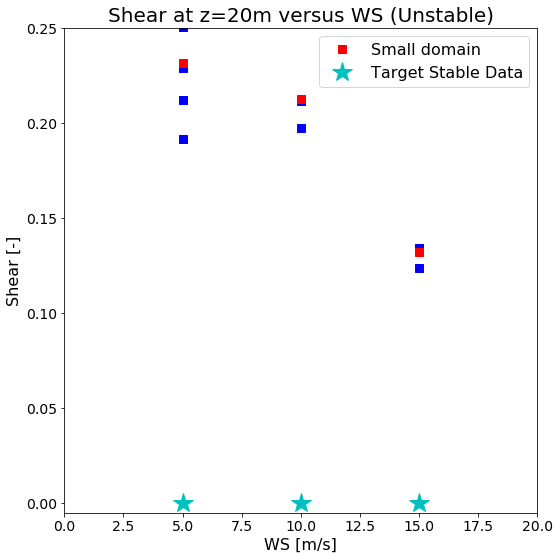

In [11]:
plt.figure(figsize=(8,8))
plt.rc('font', size=14)
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = rundict['color'] if 'color' in rundict else 'r'
    plt.plot(rundata[0], rundata[2], 's', color=pltcolor, markersize=8)

# Plot the target conditions
plt.plot(target_unstable[0],  target_unstable[2],  'c*',  markersize=20, label='target unstable')

plt.xlim([0, 20])
plt.xlabel('WS [m/s]', fontsize=16)
plt.ylabel('Shear [-]', fontsize=16)
plt.ylim([-0.005, 0.25])
plt.title('Shear at z=20m versus WS (Unstable)', fontsize=20)
legend_el = [ #Line2D([0],[0], linestyle='', marker='s', markersize=8, color='b', label='Large domain'),
             Line2D([0],[0], linestyle='', marker='s', markersize=8, color='r', label='Small domain'),
             Line2D([0],[0], linestyle='', marker='*', markersize=20, color='c', label='Target Stable Data')]
plt.legend(handles=legend_el, fontsize=16)
plt.tight_layout()

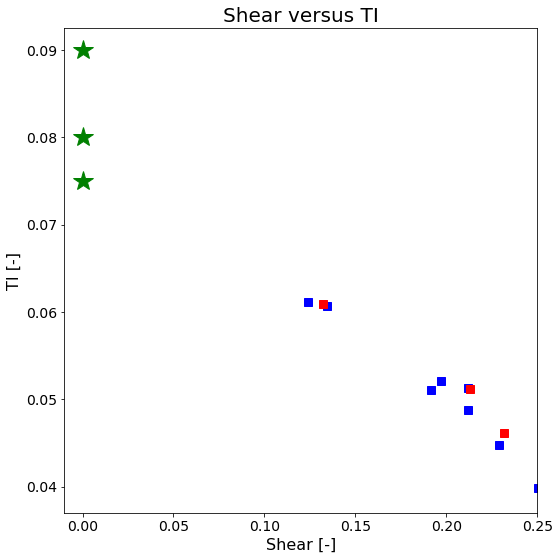

In [9]:
plt.figure(figsize=(8,8))
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = rundict['color'] if 'color' in rundict else 'r'
    plt.plot(rundata[2], rundata[1], 's', color=pltcolor, markersize=8)

plt.plot(target_unstable[2],  target_unstable[1],  'g*',  markersize=20, label='target unstable')

plt.xlim([-0.01, 0.25])
plt.xlabel('Shear [-]', fontsize=16)
plt.ylabel('TI [-]', fontsize=16)
plt.title('Shear versus TI', fontsize=20)
plt.tight_layout()

# Extract yaml file BC parameters
print("%12s %9s %9s"%("Case", "z0", "heat_flux"))
print("%12s %9s %9s"%("====", "==", "========="))
for run in runlist:
    rundict       = run[NumReqCols] if (len(run)>NumReqCols) else {}
    rundir        = baserundir+'/'+run[1]
    yamlfile      = rundir+'/'+run[3]
    with open(yamlfile) as fp:
        yamldata      = yaml.load(fp)
        BCs           = yamldata['realms'][0]['boundary_conditions']
        for bc in BCs:
            if bc['target_name'] == 'lower':
                print("%12s %9.5f % 8.3f"%
                    (run[0], bc['wall_user_data']['roughness_height'], bc['wall_user_data']['heat_flux']))
    fp.close()